# Bibliotecas

In [1]:
import pandas as pd

In [2]:
# vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score # performance evaluation criteria
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

In [5]:
import nltk
from nltk.stem import RSLPStemmer
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmed = nltk.stem.SnowballStemmer("english")
from nltk.corpus import stopwords

In [6]:
data = pd.read_csv("data")

In [7]:
data.head()

,Unnamed: 0,Transcription,Emotion
0,0,Excuse me.,neu
1,1,Do you have your forms?,fru
2,2,Yeah.,neu
3,3,Let me see them.,fru
4,4,Is there a problem?,neu


# Data Analisys

In [8]:
data.shape

(23747, 3)

In [9]:
data['Emotion'].describe()

count     23747
unique       11
top         neu
freq       8144
Name: Emotion, dtype: object

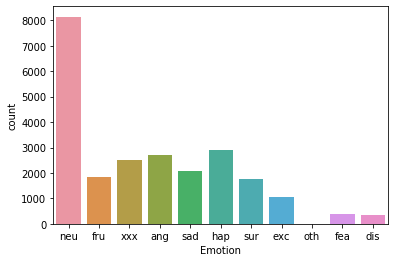

In [10]:
sns.countplot(x='Emotion', data=data);

# Limpeza dos dados

Analisando os dados previamente, alguns problemas foram detectados:
    - xxx sentimento indefinido
    - oth baixa informações
    - dis baixa informações

In [27]:
data = data[data['Emotion'] != "xxx"]
data = data[data['Emotion'] != 'oth']
data = data[data['Emotion'] != 'fru']
data = data[data['Emotion'] != "sad"]
data = data[data['Emotion'] != 'fea']
data = data[data['Emotion'] != 'sur']
data = data[data['Emotion'] != 'exc']
data = data[data['Emotion'] != 'dis']

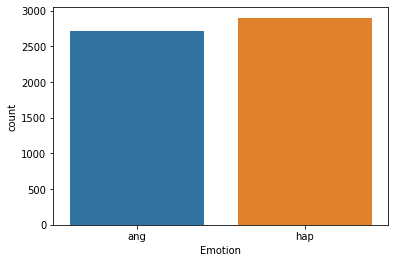

In [28]:
sns.countplot(x='Emotion', data=data);

In [29]:
data.groupby("Emotion").count()

,Unnamed: 0,Transcription,Transcription_Normalizer
Emotion,,,
ang,2710,2710,2710
hap,2903,2903,2903


In [30]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    #tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [stemmer.stem(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [31]:
data['Transcription_Normalizer'] = data.Transcription.apply(normalizer) #não obteve melhoras com lemmatize dos dados

In [32]:
data.shape

(5613, 4)

In [33]:
def retorna_label(text):
    dici = {"neu":0,"fru":1,"ang":2,"sad":3,"hap":4,"sur":5,"exc":6,"fea":7}
    return dici[text]

In [34]:
#data['discrete'] = data['Emotion'].apply(retorna_label)

In [35]:
data.head()

,Unnamed: 0,Transcription,Emotion,Transcription_Normalizer
23,23,That's out of control.,ang,that s out of control
24,24,I don't understand why this is so complicated ...,ang,i don t understand whi thi is so complic for p...
28,28,Yeah. Do you want to see my supervisor? Huh?...,ang,yeah do you want to see my supervisor huh yeah...
69,69,Well Vegas was awesome.,hap,well vega wa awesom
71,71,"And, um, I got married.",hap,and um i got marri


In [36]:
X = data['Transcription_Normalizer']
y = data['Emotion']

In [37]:
corpus_train, corpus_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
vectorizer = CountVectorizer(ngram_range = (1, 3))
#vectorizer = TfidfVectorizer(min_df=10) #resultado final piora
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

In [38]:
model = LogisticRegression(penalty="l2", C=1.0)
model.fit(X_train, y_train)

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.7658058771148709

In [40]:
from sklearn import metrics
# Print a classification report
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         ang       0.79      0.73      0.76       572
         hap       0.74      0.80      0.77       551

    accuracy                           0.77      1123
   macro avg       0.77      0.77      0.77      1123
weighted avg       0.77      0.77      0.77      1123



In [41]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,pred))

0.7658058771148709
